In [514]:
import pandas as pd

In [515]:
import os
import seaborn as sns

In [516]:
pwd

'C:\\Users\\Orijeet_Mukherjee\\Desktop\\ML project'

In [517]:
data=pd.read_csv("housing.csv")

In [518]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [519]:
data.dropna(inplace=True)

In [520]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [521]:
data['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [522]:
data.describe()
# data.drop(['ocean_proximity'],axis=1,inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [523]:
%matplotlib inline

In [524]:
import matplotlib as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

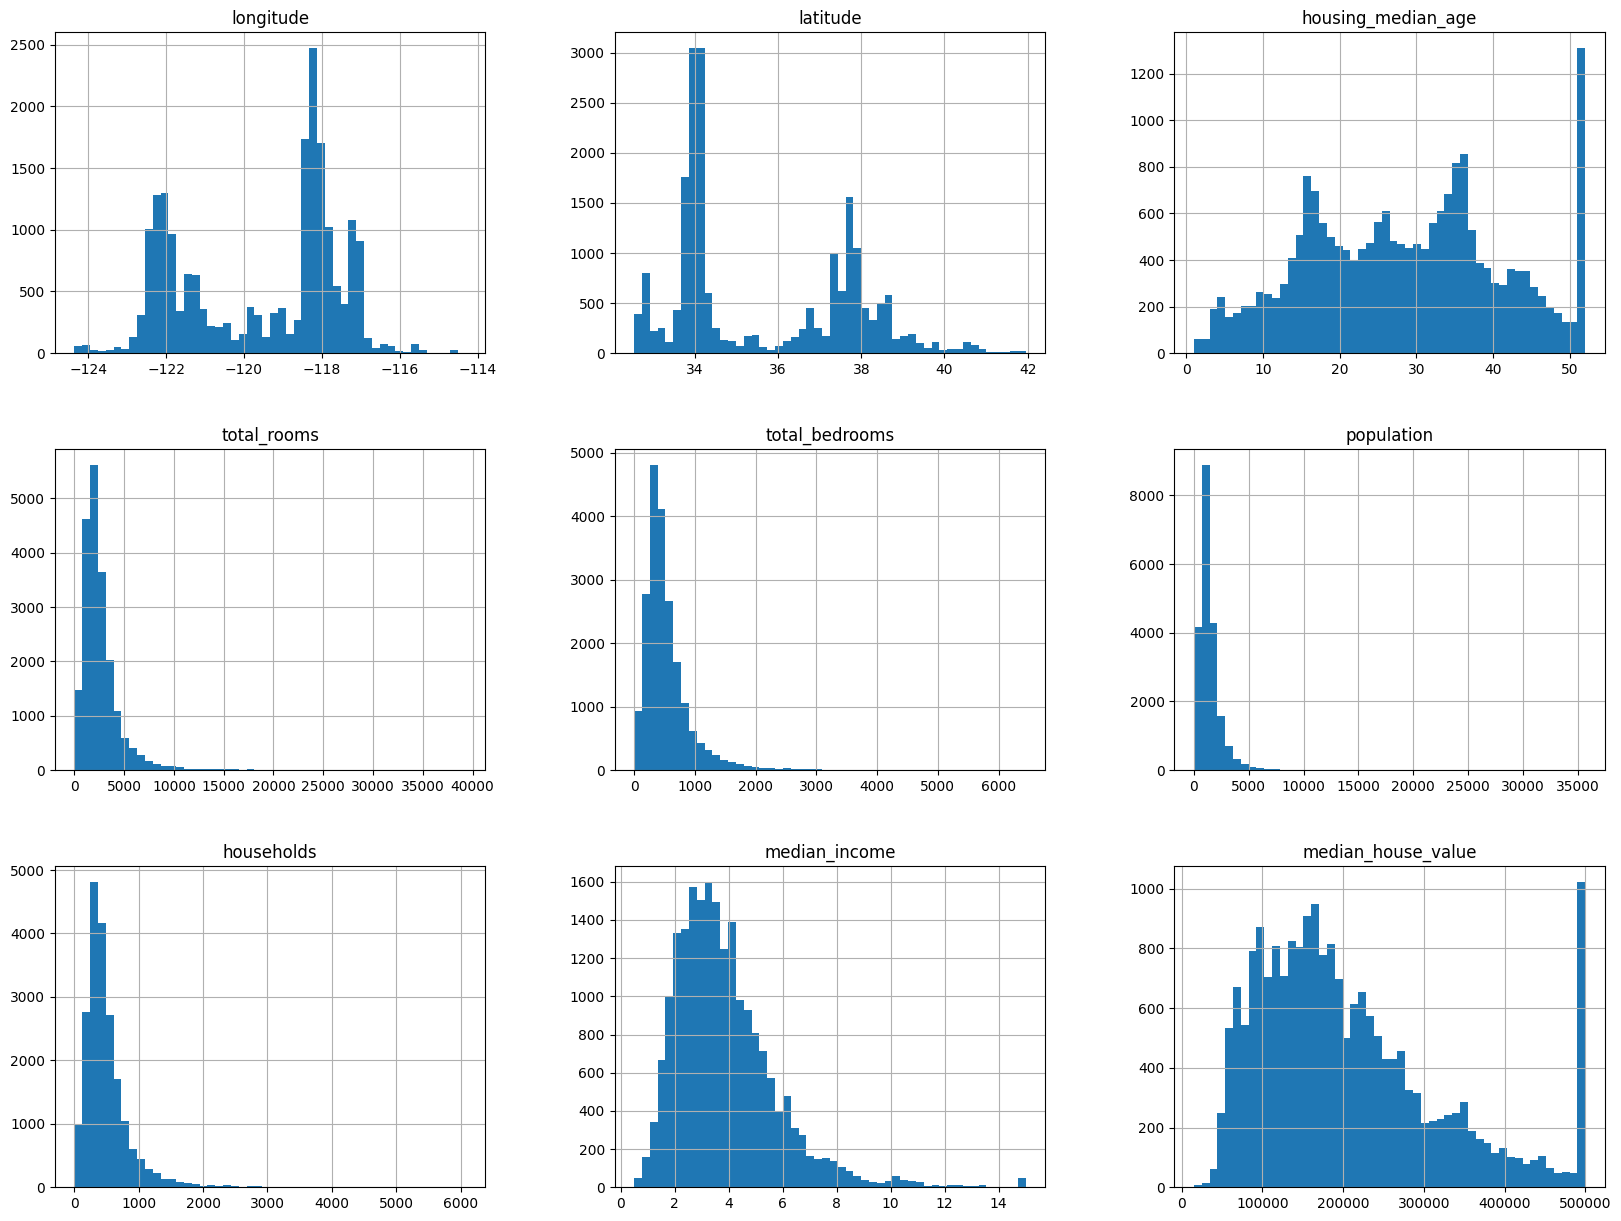

In [525]:
data.hist(bins=50, figsize=(20,15))

In [526]:
import numpy as np
np.random.seed(42)
# def split_train_test(data, test_ratio):
#         shuffled=np.random.permutation(len(data))
#         test_set_size=int(len(data)*test_ratio)
#         test_indices=shuffled[:test_set_size]
#         train_indices=shuffled[test_set_size:]
        
#         return data.iloc[train_indices], data.iloc[test_indices]

In [527]:
# train_set, test_set=split_train_test(housing,0.2)

In [528]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [529]:
 train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

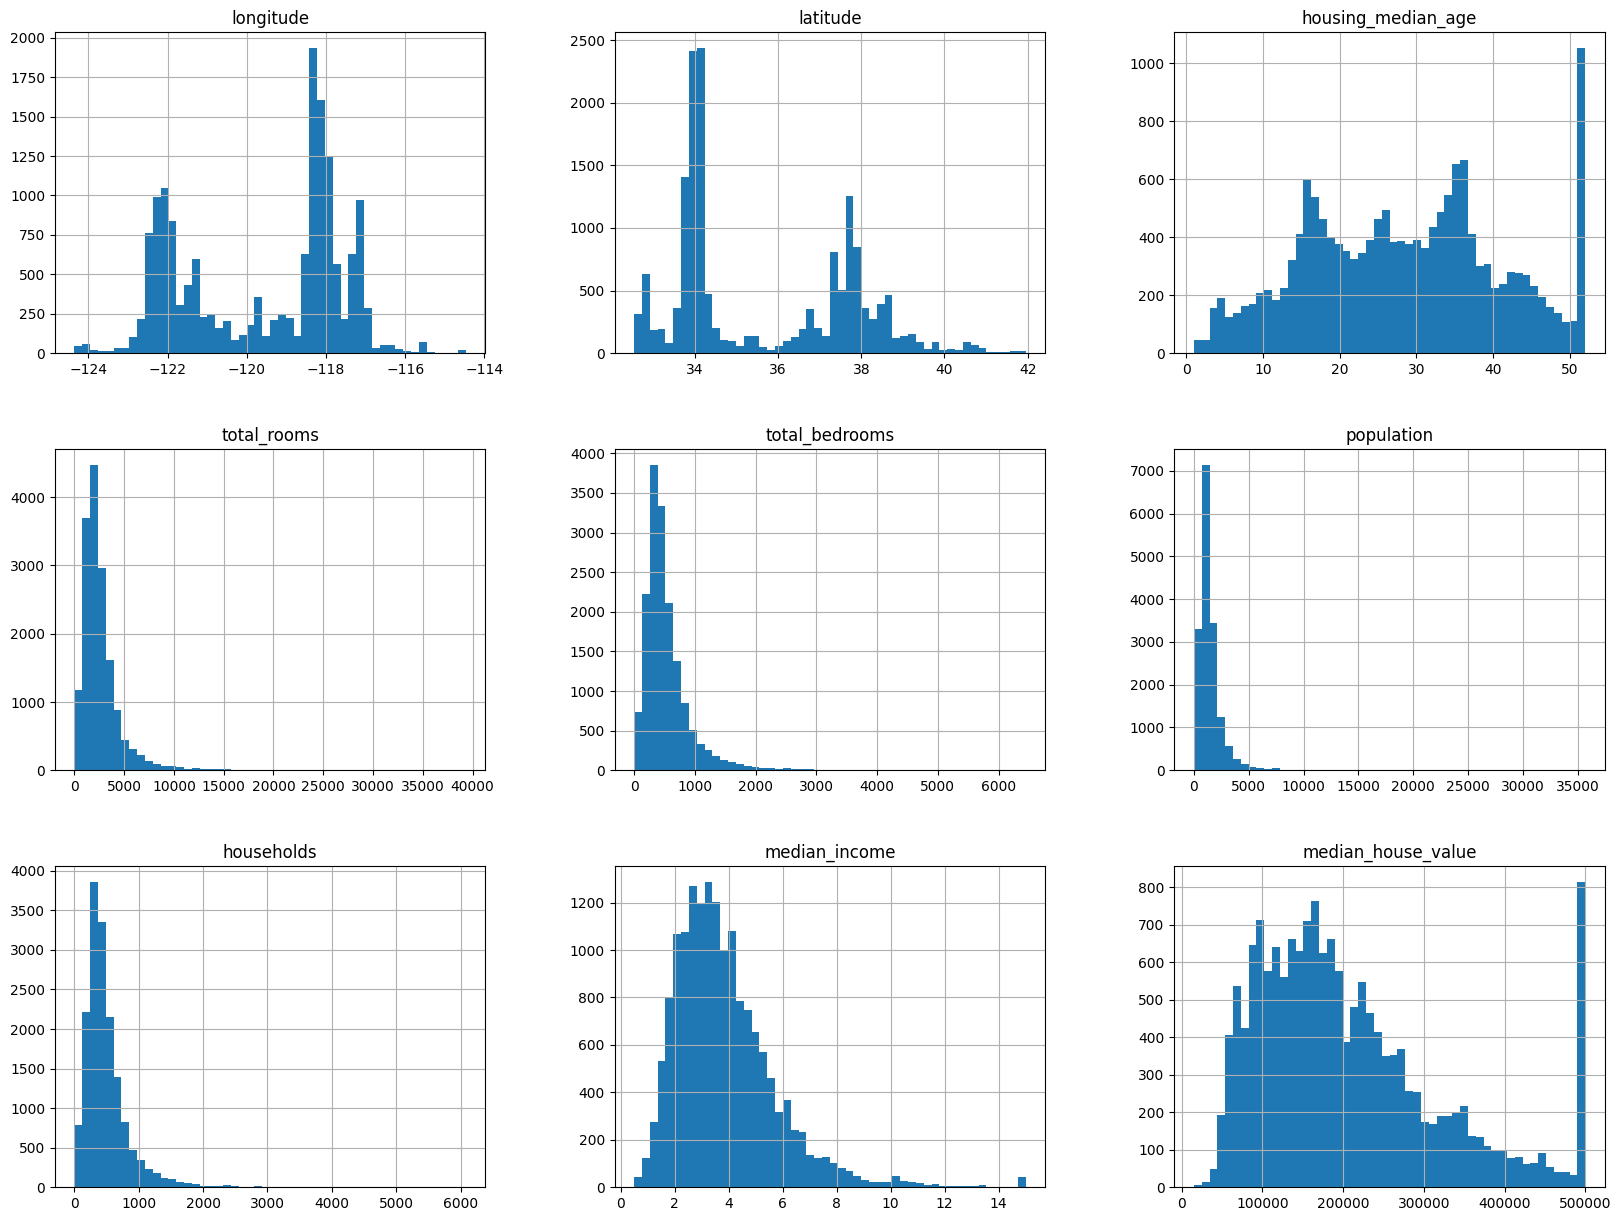

In [530]:
train_data.hist(bins=50, figsize=(20,15))

In [531]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924340,-0.106111,0.040173,0.066871,0.094641,0.054023,-0.021911,-0.048166
latitude,-0.924340,1.000000,0.009535,-0.033439,-0.066337,-0.106192,-0.071678,-0.073213,-0.141933
housing_median_age,-0.106111,0.009535,1.000000,-0.359714,-0.319073,-0.291689,-0.301818,-0.120550,0.104041
total_rooms,0.040173,-0.033439,-0.359714,1.000000,0.929102,0.851704,0.916829,0.202131,0.136040
total_bedrooms,0.066871,-0.066337,-0.319073,0.929102,1.000000,0.872241,0.978582,-0.005364,0.051352
population,0.094641,-0.106192,-0.291689,0.851704,0.872241,1.000000,0.903093,0.007224,-0.023989
households,0.054023,-0.071678,-0.301818,0.916829,0.978582,0.903093,1.000000,0.016608,0.066598
median_income,-0.021911,-0.073213,-0.120550,0.202131,-0.005364,0.007224,0.016608,1.000000,0.688695
median_house_value,-0.048166,-0.141933,0.104041,0.136040,0.051352,-0.023989,0.066598,0.688695,1.000000


<Axes: >

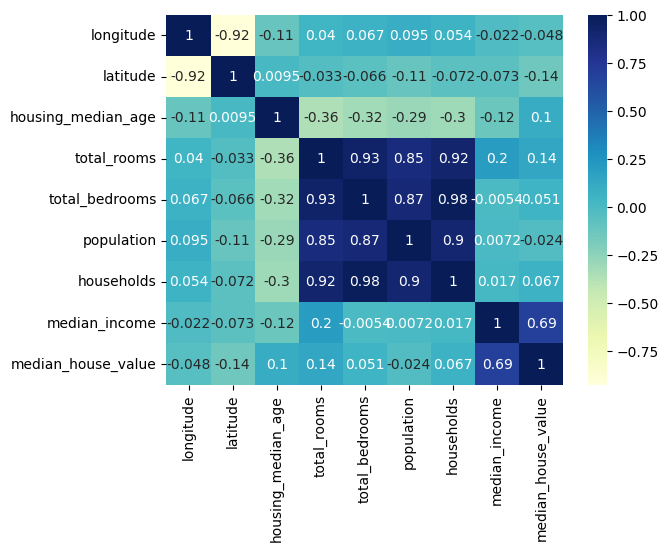

In [532]:
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap="YlGnBu")

In [533]:
train_data[ 'total_rooms'] = np.log(train_data[ 'total_rooms'] + 1)
train_data[ 'total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data[ 'population'] = np.log(train_data['population'] + 1)
train_data[ 'households'] = np.log(train_data[ 'households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

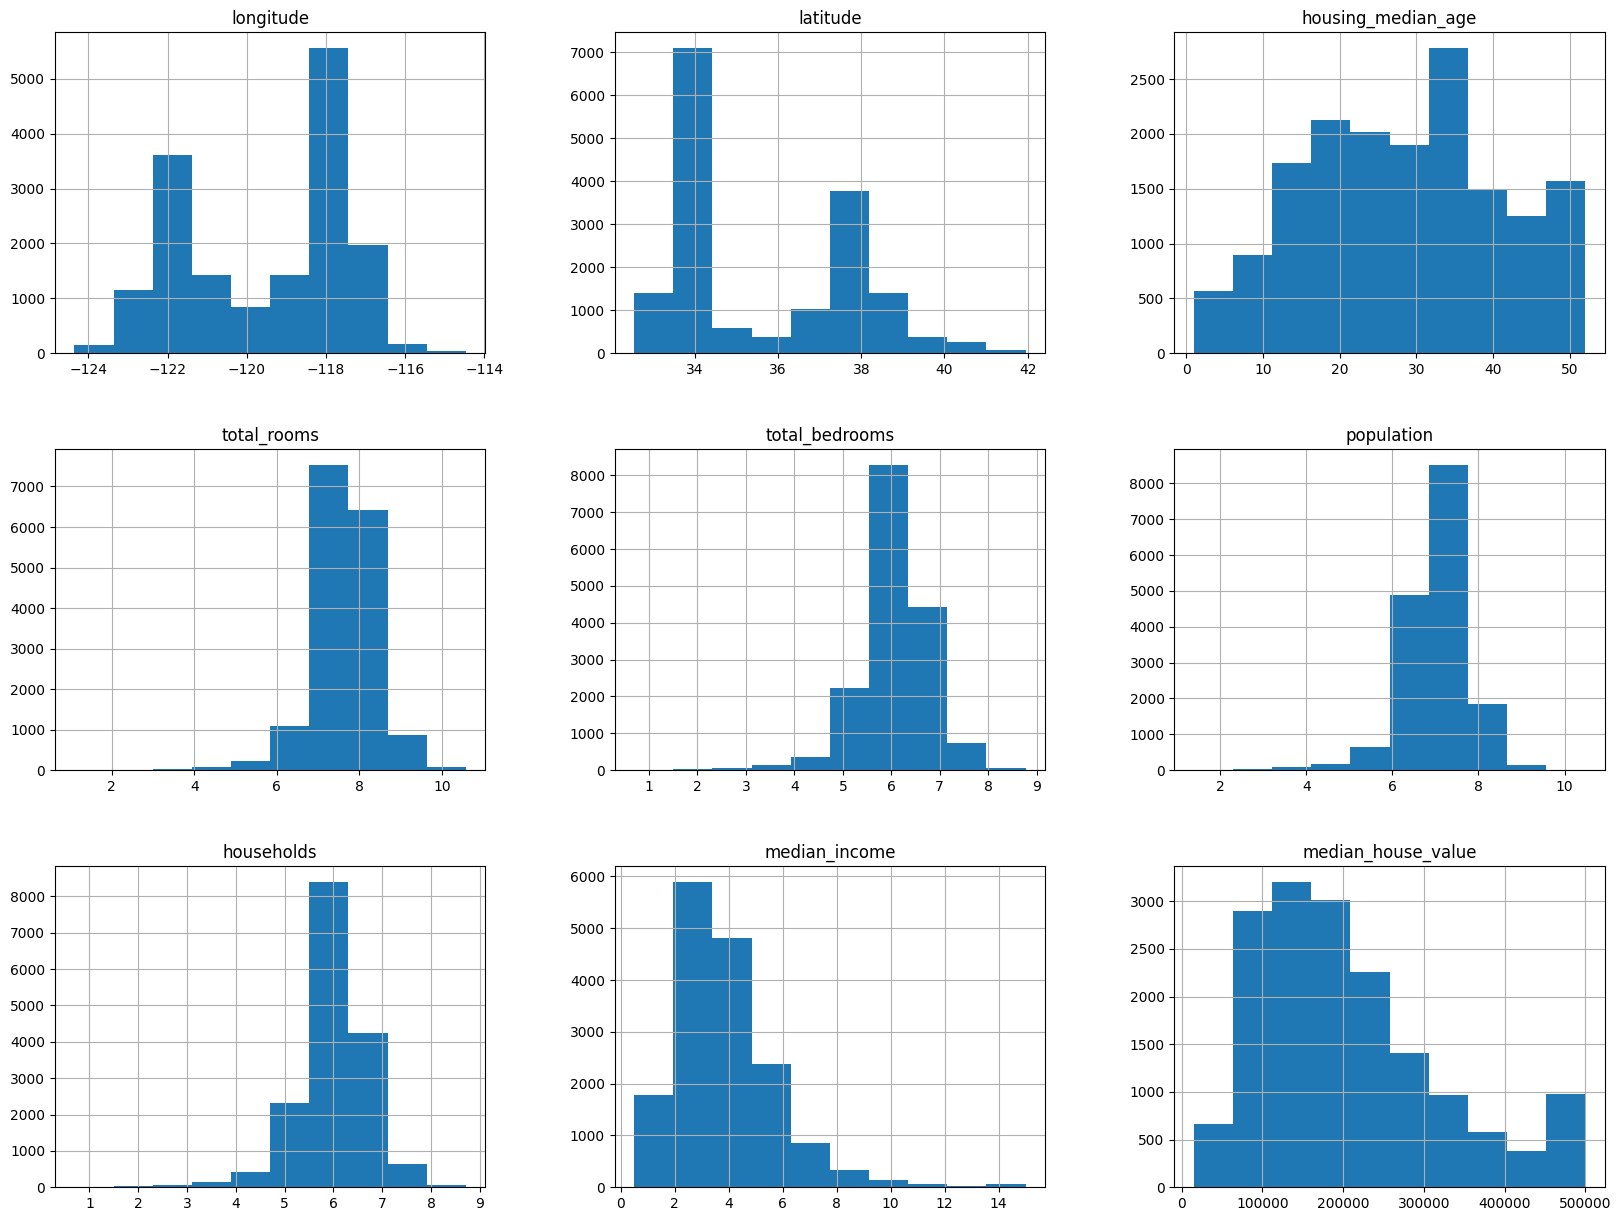

In [534]:
train_data.hist(figsize=(20,15))

In [535]:
  train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [536]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [537]:
# train_data=train_data.join(ocean_values)

In [538]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.580513,35.640569,28.615013,7.627515,6.053191,7.023669,5.982866,3.870697,206644.400098
std,2.005898,2.136181,12.577173,0.748987,0.724440,0.733920,0.724711,1.897825,115055.153216
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,7.280008,5.691203,6.669498,5.638355,2.564550,119300.000000
50%,-118.510000,34.260000,29.000000,7.661998,6.075346,7.061334,6.013715,3.536650,180100.000000
75%,-118.010000,37.720000,37.000000,8.049666,6.472346,7.450661,6.403574,4.750000,263800.000000
max,-114.470000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,15.000100,500001.000000


<Axes: >

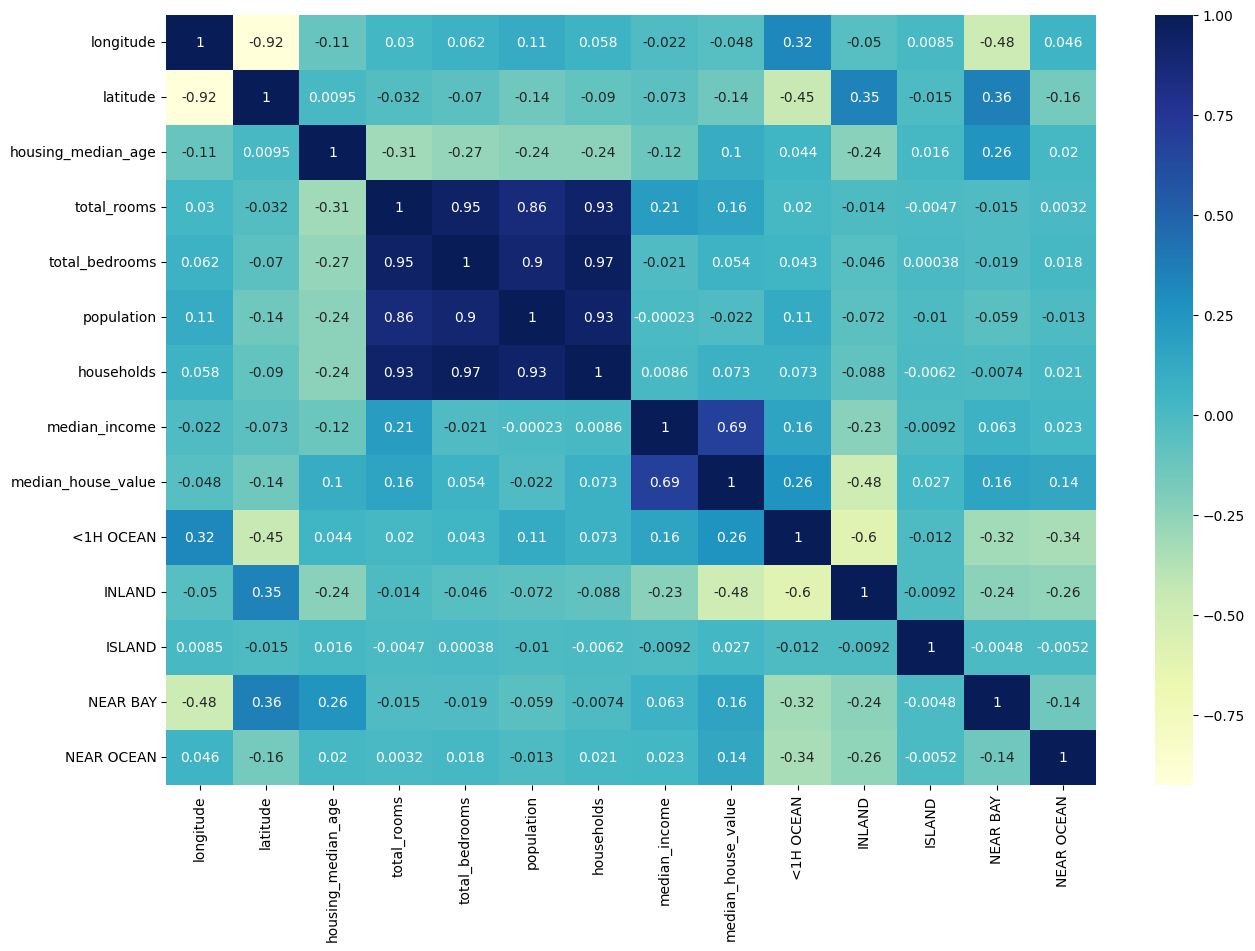

In [539]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

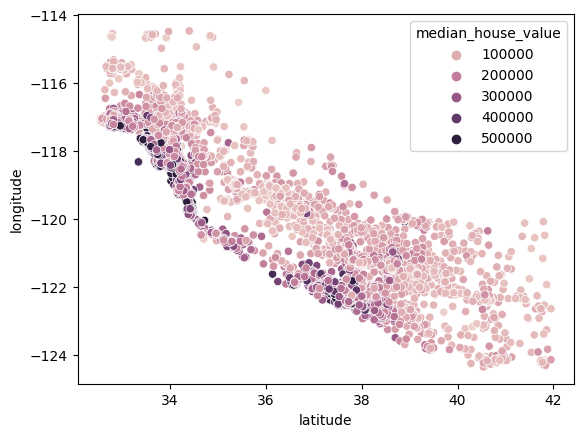

In [540]:
sns.scatterplot(x="latitude",y="longitude",data=train_data, hue="median_house_value")

In [541]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

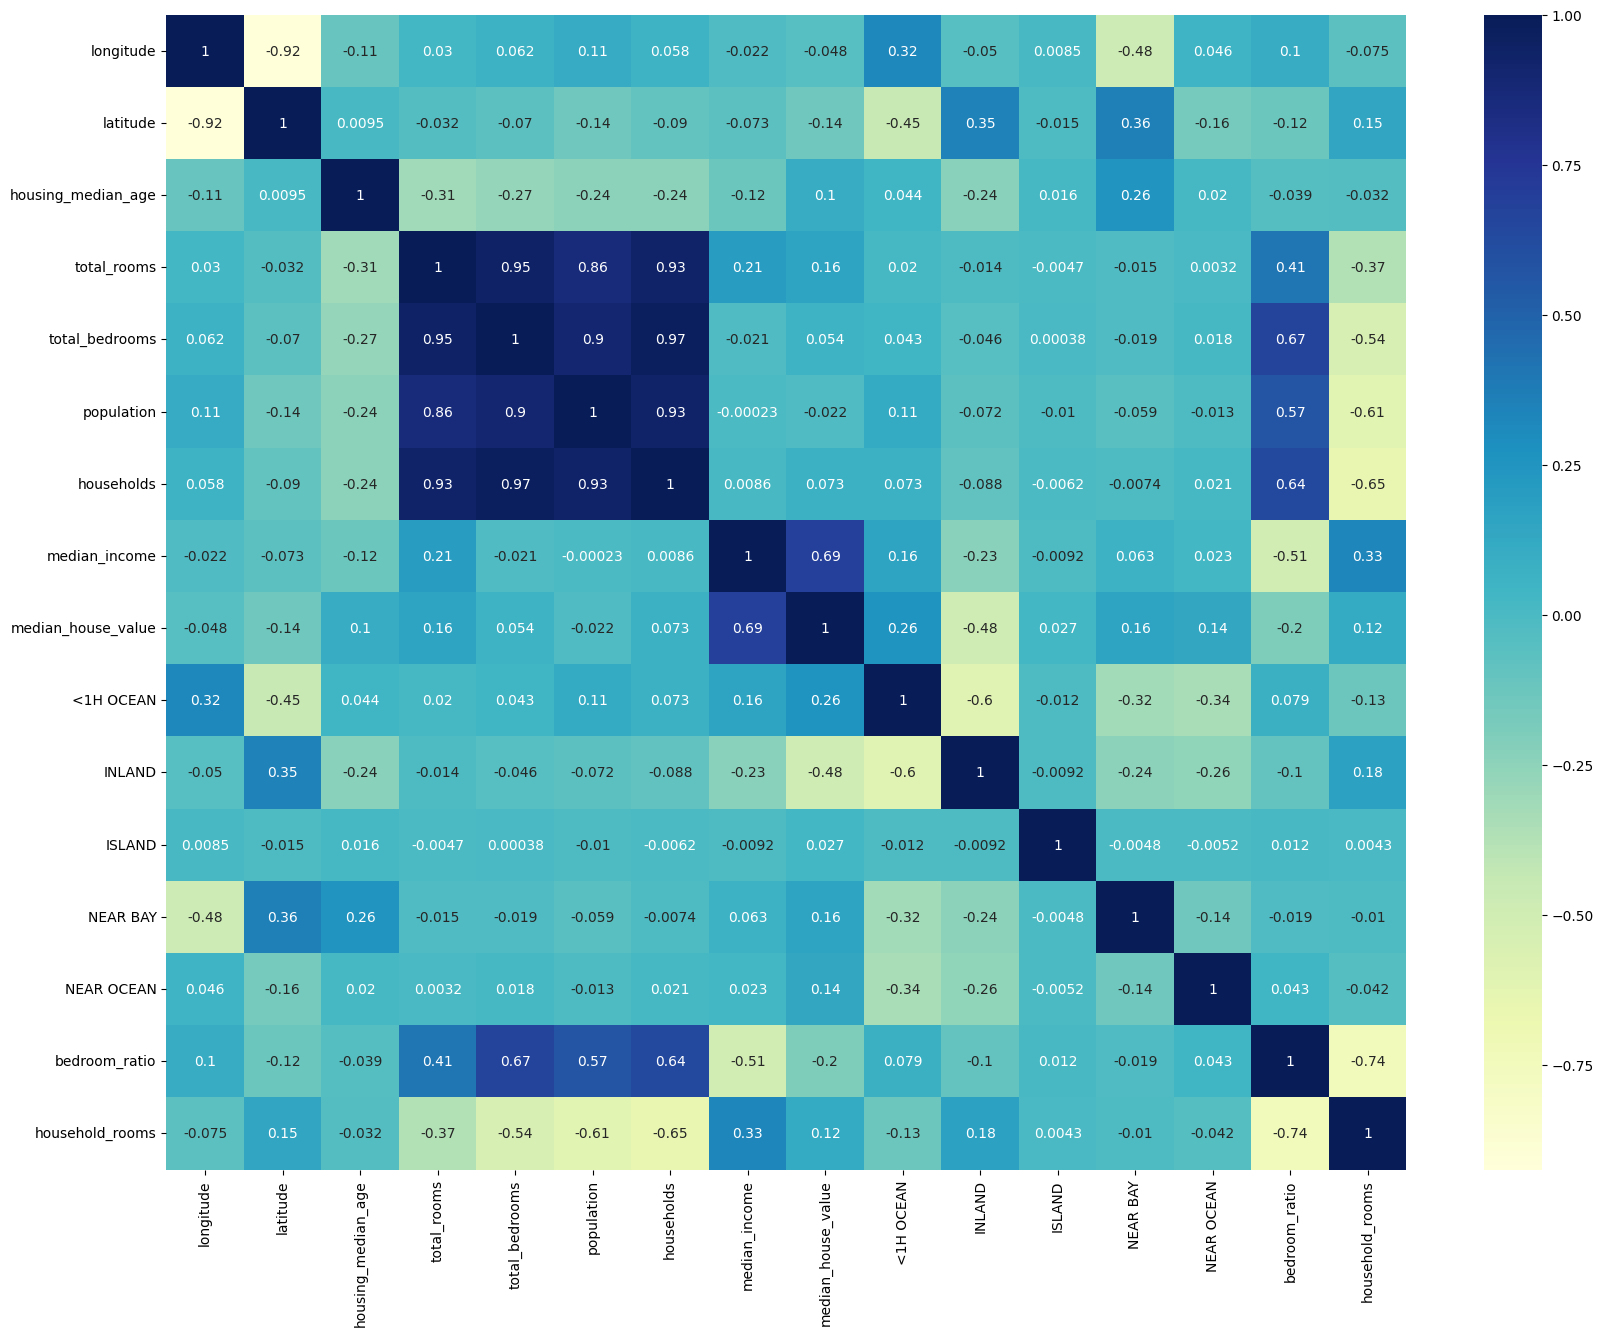

In [542]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [543]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [544]:
x_train,y_train= train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)

In [545]:
reg=LinearRegression()

In [546]:
reg.fit(x_train_s, y_train)

LinearRegression()

In [547]:
test_data = x_test.join(y_test)

test_data[ 'total_rooms'] = np.log(test_data[ 'total_rooms'] + 1)
test_data[ 'total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data[ 'population'] = np.log(test_data['population'] + 1)
test_data[ 'households'] = np.log(test_data[ 'households'] + 1)

test_data = test_data. join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test,y_test= test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [548]:
x_test_s=scaler.fit_transform(x_test)

In [549]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14416,-117.24,32.79,20.0,6.869014,5.631212,6.265301,5.541264,3.1838,245800.0,False,False,False,False,True,0.819799,1.239612
16383,-121.29,38.01,2.0,8.764678,7.018402,8.110127,6.864848,4.4871,137900.0,False,True,False,False,False,0.800760,1.276748
7731,-118.14,33.92,31.0,8.224700,6.749931,7.746733,6.687109,3.2237,218200.0,True,False,False,False,False,0.820690,1.229934
1410,-122.07,37.94,30.0,7.139660,5.624018,6.562444,5.402677,2.8920,220800.0,False,False,False,True,False,0.787715,1.321504
1335,-121.89,37.99,4.0,7.683404,6.393591,6.834109,6.135565,4.1016,170500.0,False,True,False,False,False,0.832130,1.252273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,7.978311,6.666957,7.076654,6.620073,3.5985,500001.0,False,False,False,False,True,0.835635,1.205170
6274,-117.95,34.03,33.0,7.486053,5.978886,7.325149,5.932245,3.3389,157900.0,True,False,False,False,False,0.798670,1.261926
2997,-119.03,35.32,12.0,7.909122,6.309918,7.166266,6.261492,2.5575,100200.0,False,True,False,False,False,0.797803,1.263137
13440,-117.42,34.08,28.0,7.741099,6.040255,7.180070,6.098074,3.4844,127700.0,False,True,False,False,False,0.780284,1.269433


In [550]:
reg.score(x_test_s,y_test)

0.6692303774756763

In [551]:
from sklearn.ensemble import RandomForestRegressor

In [557]:
forest= RandomForestRegressor()
forest.fit(x_test_s,y_test)

RandomForestRegressor()

In [558]:
forest.score(x_test_s,y_test)

0.9668944175372451

In [572]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a RandomForestRegressor instance
forest = RandomForestRegressor()

# Train the model on the training data
forest.fit(x_train_s, y_train)

# Predict using the trained model on the testing data
predicted_values = forest.predict(x_test_s)

# Compare the predicted values with the actual values (y_test)
mse = mean_squared_error(y_test, predicted_values)
mae = mean_absolute_error(y_test, predicted_values)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 3191827329.057232
Mean Absolute Error (MAE): 38753.19485196966


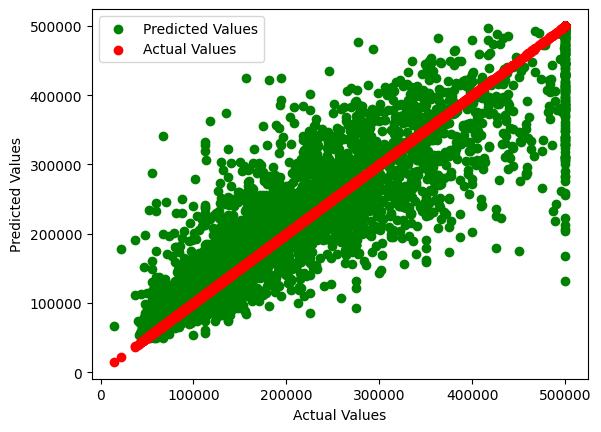

In [575]:
plt.scatter(y_test, predicted_values, color='green', label='Predicted Values')
plt.scatter(y_test, y_test, color='red', label='Actual Values')

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()